In [418]:
#dataframes
import pandas as pd

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
import sys
sys.path.append("../")
import odor_stat_calculations as osc


#plots
import pylab as plt
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
from figurefirst import FigureLayout,mpl_functions
import figurefirst
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc

import time
np.set_printoptions(suppress=True)
import fly_plot_lib.plot as fpl
FS=7


In [419]:
def load():
    layout = fifi.svg_to_axes.FigureLayout('../../Figure2/algorithm.svg', autogenlayers=True, make_mplfigures=True, hide_layers=[])
    return layout
path="/home/vbl/DataAnalysis/data/simulator/figure/Figure_hws/"
# df_test = pd.read_hdf('../../data/simulator/figure/Figure_hws/hws_jan22.h5')
dfres=pd.read_hdf("/home/vbl/DataAnalysis/data/simulator/algorithm/WindyMASigned.h5")
dirname = '../../data/simulator/figure/Figure_hws/'
hmap_data = np.load(str(dirname) + "hmap.npz")
    
fitted_p_heatmap=hmap_data['fitted_heatmap']
xedges=hmap_data['xedges']
yedges=hmap_data['yedges']

index = osc.get_index(dfres.odor,4.5)
whiff_initiation_points = [sub[0] for sub in index]
dfres['whiff_flag'] = 0

# Set 1 for the specified indices in the 'whiff_flag' column
dfres.iloc[whiff_initiation_points, dfres.columns.get_loc('whiff_flag')] = 1

dfres['distance_along_streakline']=dfres.distance_along_streakline*dfres.xsign
dfres['nearest_from_streakline']=dfres.nearest_from_streakline*dfres.ysign

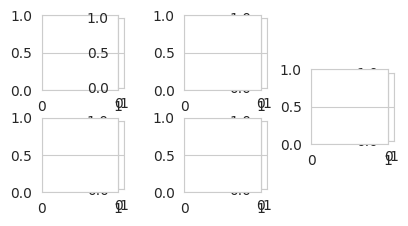

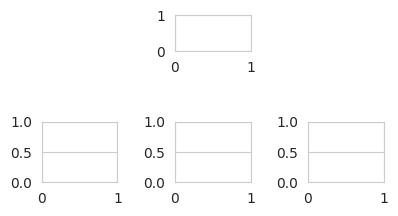

In [420]:
layout=load()

In [421]:
n_bins_x = n_bins_y = 50
heatmap_whiff, xedges, yedges = np.histogram2d(
    dfres['distance_along_streakline'], 
    dfres['nearest_from_streakline'], 
    bins=[n_bins_x, n_bins_y], 
    weights=dfres['whiff_flag']
)

heatmap_total, _, _ = np.histogram2d(
    dfres['distance_along_streakline'], 
    dfres['nearest_from_streakline'], 
    bins=[n_bins_x, n_bins_y]
)

# Calculate empirical probabilities (Equation 1)
with np.errstate(divide='ignore', invalid='ignore'):
    heatmap_prob = np.divide(
        heatmap_whiff, 
        heatmap_total, 
        out=np.zeros_like(heatmap_whiff), 
        where=heatmap_total != 0
    )

Whiffs

In [422]:
ax=layout.axes[('fig1','ax1')]
cax = ax.imshow(
    heatmap_whiff.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=30, rasterized=True,
)
ax.set_rasterization_zorder(-20)

ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.12, 0.5)
ax.ticklabel_format(useOffset=False)

# ax.set_ylim(-40,50)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

In [423]:
ax = layout.axes[('fig1', 'cbar1')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$N(Whiffs)$",rotation=90, labelpad=-17)

ax.set_yticklabels(['0', '30'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

Visits

In [424]:
ax=layout.axes[('fig1','ax1_1')]
cax = ax.imshow(
    heatmap_total.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=1000, rasterized=True,
)
ax.set_rasterization_zorder(-20)

ax.set_xlabel('x, m')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('y, m')
ax.yaxis.set_label_coords(-0.12, 0.5)

ax.ticklabel_format(useOffset=False)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

In [425]:
ax = layout.axes[('fig1', 'cbar2')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$N(Passes)$",rotation=90, labelpad=-17)

ax.set_yticklabels(['0', '1000'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

Probability of Onset

In [426]:
ax=layout.axes[('fig1','ax2')]
cax = ax.imshow(
    heatmap_prob.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=0.05, rasterized=True,
)
ax.set_rasterization_zorder(-20)

# ax.set_xlabel('x, m')
# ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.1, 0.5)

ax.ticklabel_format(useOffset=False)
ax.grid(False)
mpl_functions.adjust_spines(ax,[],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

In [427]:
ax = layout.axes[('fig1', 'cbar3')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$P(Onset)$",rotation=90, labelpad=-17)

ax.set_yticklabels(['0', '.01'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

Gaussian Field

In [428]:
def directional_gaussian_plume(x, y, A, x0, y0, base_sigma_y, distance_scale_factor_y, decay_factor_x):
    distance_x = x - x0
    distance_y = y - y0
    sigma_y = base_sigma_y + distance_scale_factor_y * np.power(np.abs(distance_x), 0.8)
    
    gaussian_y = np.exp(-(distance_y**2) / (2 * sigma_y**2))
    decay_term_x = np.exp(-decay_factor_x * distance_x)
    
    return A * gaussian_y * decay_term_x

# Set up the grid
n_bins_x = n_bins_y = 50

# Calculate centers for plotting
x_centers = (xedges[:-1] + xedges[1:]) / 2
y_centers = (yedges[:-1] + yedges[1:]) / 2
X_centers, Y_centers = np.meshgrid(x_centers, y_centers, indexing='ij')

# Set parameters for the Gaussian field
params = [
    1,      # A (amplitude)
    0.0,    # x0 (source x-position)
    0.0,    # y0 (source y-position)
    0.1,    # base_sigma_y
    0.8,    # distance_scale_factor_y
    0.02    # decay_factor_x
]

# Calculate the Gaussian field
gaussian_field = directional_gaussian_plume(
    X_centers, Y_centers, *params
)

In [429]:
ax=layout.axes[('fig1','ax3')]
cax = ax.imshow(
    gaussian_field.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=1, rasterized=True,
)
ax.set_rasterization_zorder(-20)

# ax.set_xlabel('x, m')
# ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.1, 0.5)

ax.ticklabel_format(useOffset=False)
ax.grid(False)
mpl_functions.adjust_spines(ax,[],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

In [430]:
ax = layout.axes[('fig1', 'cbar4')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$P(x,y)$",rotation=90, labelpad=-17)

ax.set_yticklabels(['0', '1'])
ax.tick_params(axis='y', pad=1) 
figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

Final Heatmap

In [431]:
ax=layout.axes[('fig1','ax4')]
cax = ax.imshow(
    fitted_p_heatmap.T,
    origin='lower',
    extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
    cmap='Greys', vmin=0, vmax=0.01, rasterized=True,
)
ax.set_rasterization_zorder(-20)

# ax.set_xlabel('x, m')
# ax.xaxis.set_label_coords(0.5, -0.1)
# ax.set_ylabel('y, m')
# ax.yaxis.set_label_coords(-0.1, 0.5)

ax.ticklabel_format(useOffset=False)

# ax.set_ylim(-40,50)
ax.grid(False)
mpl_functions.adjust_spines(ax,[],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-25,25],
                           xticks=[0,55],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

In [432]:
ax = layout.axes[('fig1', 'cbar5')]
ytic=[0,10]

fpl.colorbar(ax=ax, colormap='Greys', orientation='vertical',ticks=ytic)
ax.set_rasterization_zorder(-20)
mpl_functions.adjust_spines(ax, ['right'], 
                                    smart_bounds=True,
                                    spine_locations={'right': 2}, 
                                    yticks=ytic,
                                    tick_length=1.5,
                                    linewidth=0.5)

ax.set_ylabel("$P(x,y)_{onset}$",rotation=90, labelpad=-15, fontsize=6)

ax.set_yticklabels(['0', '.01'], fontsize=7)
ax.tick_params(axis='y', pad=1) 
# figurefirst.mpl_functions.set_fontsize(ax, FS)

layout.append_figure_to_layer(layout.figures['fig1'], 'fig1', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

Plot Intermediates

In [433]:
df_test =pd.read_hdf("/home/vbl/DataAnalysis/data/simulator/algorithm/hws_feb3_intermediates.h5") 

In [434]:
# layout=load()

In [435]:
ax=layout.axes[('fig2','axbinary')]
ax.plot(df_test.time, df_test.whiff_predicted, linewidth=1,c='black', rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
ax.set_xlabel('1 s')

ax.xaxis.set_label_coords(0.5, -0.3)

ax.set_xlim(331.5,332.5)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[0,1],
                           xticks=[331.5,332.5],
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

In [436]:
xlimTs=[330,335]

ax=layout.axes[('fig2','ax5')]
ax.plot(df_test.time, df_test.logistic_transform, linewidth=1,c='black', rasterized=True)
ax.set_rasterization_zorder(-20)
# xlimTs=[138,143]
ax.set_xticklabels([])

ax.set_xlabel('5 s')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylabel('odor, a.u.')
ax.yaxis.set_label_coords(-0.1, 0.5)
ax.set_xlim(xlimTs)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

In [437]:
ax=layout.axes[('fig2','ax6')]
ax.plot(df_test.time, df_test.ar2_output, linewidth=1,c='black', rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
ax.set_xlabel('5 s')
ax.xaxis.set_label_coords(0.5, -0.15)
ax.set_ylim(-10,20)
ax.set_xlim(xlimTs)
ax.grid(False)

mpl_functions.adjust_spines(ax,['left', 'bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-10,0,10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')

In [438]:
ax=layout.axes[('fig2','ax7')]
ax.plot(df_test.time, df_test.predicted_odor, linewidth=1,c='black', rasterized=True)
ax.axhline(4.5, color='r', linestyle='--', linewidth= 0.5, rasterized=True)
ax.set_rasterization_zorder(-20)
ax.set_xticklabels([])
ax.set_xlabel('5 s')
ax.xaxis.set_label_coords(0.5, -0.15)

ax.set_xlim(xlimTs)
ax.grid(False)
mpl_functions.adjust_spines(ax,['left','bottom'],
                           spine_locations={'left': 5, 'bottom': 5}, 
                           smart_bounds=True,
                           yticks=[-10,0,10,25],
                           xticks=xlimTs,
                           linewidth=0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig2'], 'fig2', cleartarget=True)
layout.write_svg('../../Figure2/algorithm.svg')